In [1]:
# Import the standard libraries
import pandas as pd
import numpy as np
import json
import requests

# Daytime
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Some Visualization settings
from IPython.display import set_matplotlib_formats
from matplotlib.dates import DateFormatter
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

# Munich culture and leisure

In this Jupyter notebook, data records on the important leisure and cultural facilities of the state capital Munich are analysed.
Special emphasis is placed on the number of visitors, as we need this data for the recomodation system.
More informations related to the dataset can be found under the following link: https://www.muenchen.de/rathaus/Stadtinfos/Statistik/News/Corona-Sonderseite/Kultur.html

In [2]:
# Visualize the different sheets of the excel file
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.ExcelFile(url)
df.sheet_names

['INHALTSÜBERSICHT',
 'ARBEITSMARKT',
 'BAUEN',
 'BEVÖLKERUNG',
 'EINBÜRGERUNGEN',
 'FEUERWEHR MÜNCHEN',
 'FLUGVERKEHR',
 'FREIZEIT',
 'KFZ-Bestand',
 'KFZ-Neuzulassungen',
 'KINOS',
 'MUSEEN',
 'ORCHESTER',
 'SOZIALE LEISTUNGEN',
 'THEATER',
 'TOURISMUS',
 'VERKEHRSUNFÄLLE',
 'WIRTSCHAFT',
 'WITTERUNG',
 'IMPRESSUM']

The upper column information could be used for an fully automated download of the complete excelsheet

## Leisure

In [3]:
# Data download
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='FREIZEIT')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202001,7727.0,3360.0,-62.90,129.97,77709.0
1,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202002,16770.0,12290.0,117.03,36.45,78082.0
2,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202003,1290.0,17580.0,-92.31,-92.66,76725.0
3,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202004,0.0,52400.0,-100.00,-100.00,NaN
4,Besucher*innen,Außenanlagen Olympiapark (Veranstaltungen),2020,202005,0.0,101080.0,NaN,-100.00,NaN


In [4]:
# Change format of month column
for index in df.index:
    item = str(df.MONAT.loc[index])
    df.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df['DATE'] = pd.to_datetime(df['MONAT'])
# Drop unused columns
df_clean = df.drop(['MONATSZAHL','JAHR','MONAT'],axis=1)
df_clean.head()

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,AUSPRAEGUNG,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,DATE
0,Außenanlagen Olympiapark (Veranstaltungen),7727.0,3360.0,-62.90,129.97,77709.0,2020-01-01
1,Außenanlagen Olympiapark (Veranstaltungen),16770.0,12290.0,117.03,36.45,78082.0,2020-02-01
2,Außenanlagen Olympiapark (Veranstaltungen),1290.0,17580.0,-92.31,-92.66,76725.0,2020-03-01
3,Außenanlagen Olympiapark (Veranstaltungen),0.0,52400.0,-100.00,-100.00,NaN,2020-04-01
4,Außenanlagen Olympiapark (Veranstaltungen),0.0,101080.0,NaN,-100.00,NaN,2020-05-01


In [5]:
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(1715, 7)


array(['Außenanlagen Olympiapark (Veranstaltungen)',
       'Kleine Olympiahalle', 'Olympia-Eissportzentrum', 'Olympiahalle',
       'Olympiastadion', 'Olympiaturm', 'Tierpark Hellabrunn'],
      dtype=object)

In [6]:
# Print features
df_clean.columns

Index(['AUSPRAEGUNG', 'WERT', 'VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT',
       'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT', 'DATE'],
      dtype='object')

In [7]:
# Check for missing values
df_clean.isnull().sum()

AUSPRAEGUNG                         0
WERT                              124
VORJAHRESWERT                     205
VERAEND_VORMONAT_PROZENT          190
VERAEND_VORJAHRESMONAT_PROZENT    248
ZWOELF_MONATE_MITTELWERT          138
DATE                                0
dtype: int64

In [8]:
# Check for missung values in 2020
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.DATE >= '2020-01-01'].copy()))

AUSPRAEGUNG                        0
WERT                               0
VORJAHRESWERT                      1
VERAEND_VORMONAT_PROZENT           9
VERAEND_VORJAHRESMONAT_PROZENT     1
ZWOELF_MONATE_MITTELWERT          14
DATE                               0
dtype: int64
Number of values for 2020: 35


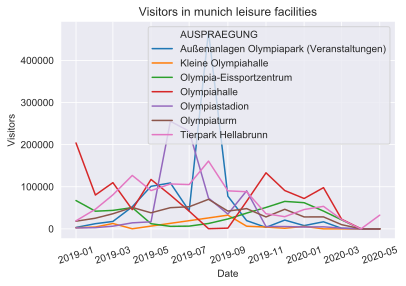

In [9]:
# Plot recent data
fig, ax1 = plt.subplots()
df_plot = df_clean[df_clean.DATE >= '2019-01-01'].copy()
sns.lineplot(x='DATE',y='WERT',hue='AUSPRAEGUNG',data=df_plot,estimator=None, ax=ax1)
ax1.set(xlabel="Date",
       ylabel="Visitors",
       title="Visitors in munich leisure facilities")
plt.xticks(rotation=18)
sns.despine(fig)

In [10]:
# Save the cleaned data as a csv file
df_clean = df_clean[['AUSPRAEGUNG','WERT','DATE']]
df_clean = df_clean[df_clean.WERT != np.NaN]
df_clean.to_csv('../data/munich_visitors/munich-leisure-facilities.csv',index=False)

## Cinema

In [11]:
# Data download
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='KINOS')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Besucher*innen,insgesamt,2019,201901,327834,352912.0,-4.10,-7.11,286106
1,Besucher*innen,insgesamt,2019,201902,279789,341482.0,-14.66,-18.07,280965
2,Besucher*innen,insgesamt,2019,201903,316633,339001.0,13.17,-6.60,279101
3,Besucher*innen,insgesamt,2019,201904,308885,207462.0,-2.45,48.89,287553
4,Besucher*innen,insgesamt,2019,201905,289810,251870.0,-6.18,15.06,290714


In [12]:
# Change format of month column
for index in df.index:
    item = str(df.MONAT.loc[index])
    df.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df['DATE'] = pd.to_datetime(df['MONAT'])
# Drop unused columns
df_clean = df.drop(['MONATSZAHL','JAHR','MONAT'],axis=1)
df_clean.head()

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,AUSPRAEGUNG,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,DATE
0,insgesamt,327834,352912.0,-4.10,-7.11,286106,2019-01-01
1,insgesamt,279789,341482.0,-14.66,-18.07,280965,2019-02-01
2,insgesamt,316633,339001.0,13.17,-6.60,279101,2019-03-01
3,insgesamt,308885,207462.0,-2.45,48.89,287553,2019-04-01
4,insgesamt,289810,251870.0,-6.18,15.06,290714,2019-05-01


In [13]:
# Drop column "Auspraegung"
print(df_clean.AUSPRAEGUNG.unique())
df_clean = df_clean.drop(['AUSPRAEGUNG'],axis=1)
# Shape of the dataset
print(df_clean.shape)

['insgesamt']
(240, 6)


In [14]:
# Print features
df_clean.columns

Index(['WERT', 'VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT',
       'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT', 'DATE'],
      dtype='object')

In [15]:
# Check for missing values
df_clean.isnull().sum()

WERT                               0
VORJAHRESWERT                     12
VERAEND_VORMONAT_PROZENT           1
VERAEND_VORJAHRESMONAT_PROZENT    12
ZWOELF_MONATE_MITTELWERT           0
DATE                               0
dtype: int64

In [16]:
# Check for missung values in 2020
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.DATE >= '2020-01-01'].copy()))

WERT                              0
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          0
VERAEND_VORJAHRESMONAT_PROZENT    0
ZWOELF_MONATE_MITTELWERT          0
DATE                              0
dtype: int64
Number of values for 2020: 0


**No Data** from the year **2020** availible

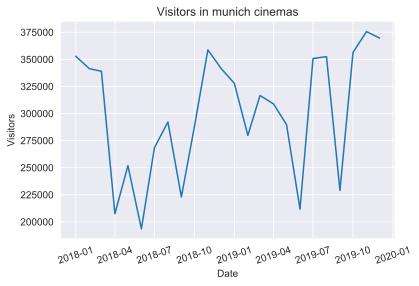

In [17]:
# Plot recent data
fig, ax1 = plt.subplots()
df_plot = df_clean[df_clean.DATE >= '2018-01-01'].copy()
sns.lineplot(x='DATE',y='WERT',data=df_plot,estimator=None, ax=ax1)
ax1.set(xlabel="Date",
       ylabel="Visitors",
       title="Visitors in munich cinemas")
plt.xticks(rotation=18)
sns.despine(fig)

In [18]:
# Save the cleaned data as a csv file
df_clean = df_clean[['WERT','DATE']]
df_clean = df_clean[df_clean.WERT != np.NaN]
df_clean.to_csv('../data/munich_visitors/munich-cinemas.csv',index=False)

## Museums

In [19]:
# Data download
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='MUSEEN')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Besucher*innen,Alte Pinakothek,2016,201601,16098.0,54261.0,4.91,-70.33,17853.0
1,Besucher*innen,Alte Pinakothek,2016,201602,12462.0,28355.0,-22.59,-56.05,16529.0
2,Besucher*innen,Alte Pinakothek,2016,201603,17194.0,12086.0,37.97,42.26,16955.0
3,Besucher*innen,Alte Pinakothek,2016,201604,15918.0,12749.0,-7.42,24.86,17219.0
4,Besucher*innen,Alte Pinakothek,2016,201605,15412.0,17578.0,-3.18,-12.32,17038.0


In [20]:
# Change format of month column
for index in df.index:
    item = str(df.MONAT.loc[index])
    df.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df['DATE'] = pd.to_datetime(df['MONAT'])
# Drop unused columns
df_clean = df.drop(['MONATSZAHL','JAHR','MONAT'],axis=1)
df_clean.head()

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,AUSPRAEGUNG,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,DATE
0,Alte Pinakothek,16098.0,54261.0,4.91,-70.33,17853.0,2016-01-01
1,Alte Pinakothek,12462.0,28355.0,-22.59,-56.05,16529.0,2016-02-01
2,Alte Pinakothek,17194.0,12086.0,37.97,42.26,16955.0,2016-03-01
3,Alte Pinakothek,15918.0,12749.0,-7.42,24.86,17219.0,2016-04-01
4,Alte Pinakothek,15412.0,17578.0,-3.18,-12.32,17038.0,2016-05-01


In [21]:
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(2127, 7)


array(['Alte Pinakothek', 'Bayerisches Nationalmuseum',
       'Deutsches Museum - Museumsinsel',
       'Deutsches Museum - Verkehrszentrum', 'Münchner Stadtmuseum',
       'Museum Brandhorst', 'Museum Mensch und Natur', 'Neue Pinakothek',
       'Pinakothek der Moderne', 'Schackgalerie',
       'Städtische Galerie im Lenbachhaus'], dtype=object)

In [22]:
# Print features
df_clean.columns

Index(['AUSPRAEGUNG', 'WERT', 'VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT',
       'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT', 'DATE'],
      dtype='object')

In [23]:
# Check for missing values
df_clean.isnull().sum()

AUSPRAEGUNG                         0
WERT                               27
VORJAHRESWERT                     153
VERAEND_VORMONAT_PROZENT           44
VERAEND_VORJAHRESMONAT_PROZENT    180
ZWOELF_MONATE_MITTELWERT           27
DATE                                0
dtype: int64

In [24]:
# Check for missung values in 2020
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.DATE >= '2020-01-01'].copy()))

AUSPRAEGUNG                       0
WERT                              6
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          6
VERAEND_VORJAHRESMONAT_PROZENT    6
ZWOELF_MONATE_MITTELWERT          6
DATE                              0
dtype: int64
Number of values for 2020: 23


Looking at the data, it can be seen that the missing values for 2020 are observed during the lockdown and can therefore be set to zero. We do not change the other features (e.g. set them to zero) but we keep them.

In [25]:
for index in df_clean.index:
    if df_clean.DATE.loc[index] >= pd.to_datetime('2020-01-01'):
        if np.isnan(df_clean.WERT.loc[index]):
            #display(pd.DataFrame(df_clean.loc[index]))
            df_clean.WERT.loc[index] = 0
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isna().sum())

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


AUSPRAEGUNG                       0
WERT                              0
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          6
VERAEND_VORJAHRESMONAT_PROZENT    6
ZWOELF_MONATE_MITTELWERT          6
DATE                              0
dtype: int64


,AUSPRAEGUNG,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,DATE
204,Bayerisches Nationalmuseum,11014.0,6935.0,-25.07,58.82,6688.0,2020-01-01
205,Bayerisches Nationalmuseum,8289.0,5964.0,-24.74,38.98,6882.0,2020-02-01
206,Bayerisches Nationalmuseum,3169.0,5930.0,-61.77,-46.56,6652.0,2020-03-01
207,Bayerisches Nationalmuseum,0.0,3861.0,NaN,NaN,NaN,2020-04-01
208,Bayerisches Nationalmuseum,6935.0,7380.0,-47.03,-6.03,7014.0,2019-01-01


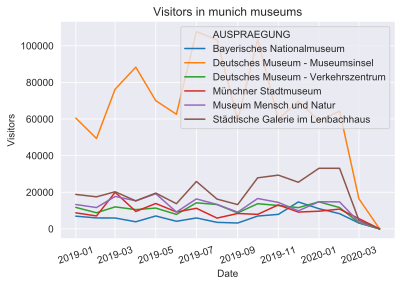

In [26]:
# Plot recent data
fig, ax1 = plt.subplots()
df_plot = df_clean[df_clean.DATE >= '2019-01-01'].copy()
sns.lineplot(x='DATE',y='WERT',hue='AUSPRAEGUNG',data=df_plot,estimator=None, ax=ax1)
ax1.set(xlabel="Date",
       ylabel="Visitors",
       title="Visitors in munich museums")
plt.xticks(rotation=18)
sns.despine(fig)
df_plot.head()

In [27]:
# Save the cleaned data as a csv file
df_clean = df_clean[['AUSPRAEGUNG','WERT','DATE']]
df_clean = df_clean[df_clean.WERT != np.NaN]
df_clean.to_csv('../data/munich_visitors/munich-museums.csv',index=False)

## Orchestra

In [28]:
# Data download
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='ORCHESTER')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Platzausnutzung,Bayerisches Staatsorchester,2020,202001,98.4,96.8,1.76,1.65,85.0
1,Platzausnutzung,Bayerisches Staatsorchester,2020,202002,96.6,98.9,-1.83,-2.33,85.0
2,Platzausnutzung,Bayerisches Staatsorchester,2020,202003,NaN,0.0,NaN,NaN,NaN
3,Platzausnutzung,Bayerisches Staatsorchester,2020,202004,NaN,92.3,NaN,NaN,NaN
4,Platzausnutzung,Bayerisches Staatsorchester,2020,202005,NaN,87.1,NaN,NaN,NaN


In [29]:
# Change format of month column
for index in df.index:
    item = str(df.MONAT.loc[index])
    df.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df['DATE'] = pd.to_datetime(df['MONAT'])
# Drop unused columns
df_clean = df.drop(['JAHR','MONAT'],axis=1)
df_clean.head()

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,MONATSZAHL,AUSPRAEGUNG,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,DATE
0,Platzausnutzung,Bayerisches Staatsorchester,98.4,96.8,1.76,1.65,85.0,2020-01-01
1,Platzausnutzung,Bayerisches Staatsorchester,96.6,98.9,-1.83,-2.33,85.0,2020-02-01
2,Platzausnutzung,Bayerisches Staatsorchester,NaN,0.0,NaN,NaN,NaN,2020-03-01
3,Platzausnutzung,Bayerisches Staatsorchester,NaN,92.3,NaN,NaN,NaN,2020-04-01
4,Platzausnutzung,Bayerisches Staatsorchester,NaN,87.1,NaN,NaN,NaN,2020-05-01


In [30]:
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(1470, 8)


array(['Bayerisches Staatsorchester', 'Münchner Philharmoniker'],
      dtype=object)

In [31]:
# Print features
df_clean.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT', 'DATE'],
      dtype='object')

In [32]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
WERT                              189
VORJAHRESWERT                     237
VERAEND_VORMONAT_PROZENT          339
VERAEND_VORJAHRESMONAT_PROZENT    297
ZWOELF_MONATE_MITTELWERT          192
DATE                                0
dtype: int64

In [33]:
# Check for missung values in 2020
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.DATE >= '2020-01-01'].copy()))

MONATSZAHL                         0
AUSPRAEGUNG                        0
WERT                              18
VORJAHRESWERT                      0
VERAEND_VORMONAT_PROZENT          18
VERAEND_VORJAHRESMONAT_PROZENT    18
ZWOELF_MONATE_MITTELWERT          18
DATE                               0
dtype: int64
Number of values for 2020: 30


Looking at the data, it can be seen that the missing values for 2020 are observed during the lockdown and can therefore be set to zero. We do not change the other features (e.g. set them to zero) but we keep them.

In [34]:
for index in df_clean.index:
    if df_clean.DATE.loc[index] >= pd.to_datetime('2020-01-01'):
        if np.isnan(df_clean.WERT.loc[index]):
            #display(pd.DataFrame(df_clean.loc[index]))
            df_clean.WERT.loc[index] = 0
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isna().sum())

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


MONATSZAHL                         0
AUSPRAEGUNG                        0
WERT                               0
VORJAHRESWERT                      0
VERAEND_VORMONAT_PROZENT          18
VERAEND_VORJAHRESMONAT_PROZENT    18
ZWOELF_MONATE_MITTELWERT          18
DATE                               0
dtype: int64


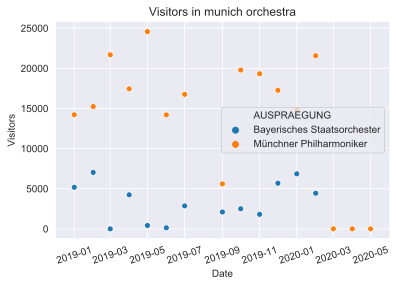

In [35]:
# Plot recent data
fig, ax1 = plt.subplots()
df_plot = df_clean[df_clean.DATE >= '2019-01-01'].copy()
# Only plot the amount of visitors
df_plot = df_plot[df_plot.MONATSZAHL == 'Besucher*innen']
sns.scatterplot(x='DATE',y='WERT',hue='AUSPRAEGUNG',data=df_plot,estimator=None, ax=ax1)
ax1.set(xlabel="Date",
       ylabel="Visitors",
       title="Visitors in munich orchestra")
plt.xticks(rotation=18)
ax1.set_xlim(pd.to_datetime('2018-12-01'),pd.to_datetime('2020-06-01'))
sns.despine(fig)

In [36]:
# Save the cleaned data as a csv file
df_clean = df_clean[df_clean.MONATSZAHL == 'Besucher*innen']
df_clean = df_clean.drop(['MONATSZAHL'],axis=1)
df_clean = df_clean[['AUSPRAEGUNG','WERT','DATE']]
df_clean = df_clean[df_clean.WERT != np.NaN]
df_clean.to_csv('../data/munich_visitors/munich-orchestra.csv',index=False)

## Theater

In [37]:
# Data download
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='THEATER')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Platzausnutzung,Münchner Kammerspiele,2020,202001,85.5,63.6,4.14,34.43,65.0
1,Platzausnutzung,Münchner Kammerspiele,2020,202002,83.9,58.8,-1.87,42.69,68.0
2,Platzausnutzung,Münchner Kammerspiele,2020,202003,84.7,70.8,0.95,19.63,69.0
3,Platzausnutzung,Münchner Kammerspiele,2020,202004,NaN,64.0,NaN,NaN,NaN
4,Platzausnutzung,Münchner Kammerspiele,2020,202005,NaN,55.1,NaN,NaN,NaN


In [38]:
# Change format of month column
for index in df.index:
    item = str(df.MONAT.loc[index])
    df.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df['DATE'] = pd.to_datetime(df['MONAT'])
# Drop unused columns
df_clean = df.drop(['JAHR','MONAT'],axis=1)
df_clean.head()

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,MONATSZAHL,AUSPRAEGUNG,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,DATE
0,Platzausnutzung,Münchner Kammerspiele,85.5,63.6,4.14,34.43,65.0,2020-01-01
1,Platzausnutzung,Münchner Kammerspiele,83.9,58.8,-1.87,42.69,68.0,2020-02-01
2,Platzausnutzung,Münchner Kammerspiele,84.7,70.8,0.95,19.63,69.0,2020-03-01
3,Platzausnutzung,Münchner Kammerspiele,NaN,64.0,NaN,NaN,NaN,2020-04-01
4,Platzausnutzung,Münchner Kammerspiele,NaN,55.1,NaN,NaN,NaN,2020-05-01


In [39]:
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(4224, 8)


array(['Münchner Kammerspiele', 'Nationaltheater',
       'Prinzregententheater (Großes Haus)', 'Residenztheater',
       'Schauburg - Theater für junges Publikum',
       'Theater am Gärtnerplatz'], dtype=object)

In [40]:
# Print features
df_clean.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT', 'DATE'],
      dtype='object')

In [41]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
WERT                              631
VORJAHRESWERT                     781
VERAEND_VORMONAT_PROZENT          947
VERAEND_VORJAHRESMONAT_PROZENT    902
ZWOELF_MONATE_MITTELWERT          634
DATE                                0
dtype: int64

In [42]:
# Check for missung values in 2020
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.DATE >= '2020-01-01'].copy()))

MONATSZAHL                         0
AUSPRAEGUNG                        0
WERT                              36
VORJAHRESWERT                      0
VERAEND_VORMONAT_PROZENT          36
VERAEND_VORJAHRESMONAT_PROZENT    36
ZWOELF_MONATE_MITTELWERT          36
DATE                               0
dtype: int64
Number of values for 2020: 90


Looking at the data, it can be seen that the missing values for 2020 are observed during the lockdown and can therefore be set to zero. We do not change the other features (e.g. set them to zero) but we keep them.

In [43]:
for index in df_clean.index:
    if df_clean.DATE.loc[index] >= pd.to_datetime('2020-01-01'):
        if np.isnan(df_clean.WERT.loc[index]):
            #display(pd.DataFrame(df_clean.loc[index]))
            df_clean.WERT.loc[index] = 0
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isna().sum())

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


MONATSZAHL                         0
AUSPRAEGUNG                        0
WERT                               0
VORJAHRESWERT                      0
VERAEND_VORMONAT_PROZENT          36
VERAEND_VORJAHRESMONAT_PROZENT    36
ZWOELF_MONATE_MITTELWERT          36
DATE                               0
dtype: int64


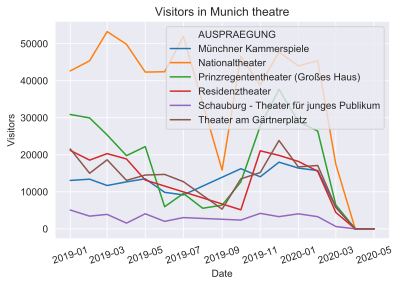

In [44]:
# Plot recent data
fig, ax1 = plt.subplots()
df_plot = df_clean[df_clean.DATE >= '2019-01-01'].copy()
# Only plot the amount of visitors
df_plot = df_plot[df_plot.MONATSZAHL == 'Besucher*innen']
sns.lineplot(x='DATE',y='WERT',hue='AUSPRAEGUNG',data=df_plot,estimator=None, ax=ax1)
ax1.set(xlabel="Date",
       ylabel="Visitors",
       title="Visitors in Munich theatre")
plt.xticks(rotation=18)
sns.despine(fig)

In [45]:
# Save the cleaned data as a csv file
df_clean = df_clean[df_clean.MONATSZAHL == 'Besucher*innen']
df_clean = df_clean.drop(['MONATSZAHL'],axis=1)
df_clean = df_clean[['AUSPRAEGUNG','WERT','DATE']]
df_clean = df_clean[df_clean.WERT != np.NaN]
df_clean.to_csv('../data/munich_visitors/munich-theatre.csv',index=False)

## Tourismus

In [46]:
# Data download
url = 'https://www.mstatistik-muenchen.de/monatszahlenmonitoring/export/xlsx/mzm_export_alle_monatszahlen.xlsx'
df = pd.read_excel(url,sheet_name='TOURISMUS')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Gäste,Ausland,2020,202001,243174,237104.0,-28.22,2.56,328039
1,Gäste,Ausland,2020,202002,223106,240175.0,-8.25,-7.11,326617
2,Gäste,Ausland,2019,201901,237104,234150.0,-25.49,1.26,312826
3,Gäste,Ausland,2019,201902,240175,216399.0,1.30,10.99,314807
4,Gäste,Ausland,2019,201903,263418,263523.0,9.68,-0.04,314798


In [47]:
# Change format of month column
for index in df.index:
    item = str(df.MONAT.loc[index])
    df.MONAT.loc[index] = item[:4]+'-'+item[-2:]
df['DATE'] = pd.to_datetime(df['MONAT'])
# Drop unused columns
df_clean = df.drop(['JAHR','MONAT'],axis=1)
df_clean.head()

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,MONATSZAHL,AUSPRAEGUNG,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,DATE
0,Gäste,Ausland,243174,237104.0,-28.22,2.56,328039,2020-01-01
1,Gäste,Ausland,223106,240175.0,-8.25,-7.11,326617,2020-02-01
2,Gäste,Ausland,237104,234150.0,-25.49,1.26,312826,2019-01-01
3,Gäste,Ausland,240175,216399.0,1.30,10.99,314807,2019-02-01
4,Gäste,Ausland,263418,263523.0,9.68,-0.04,314798,2019-03-01


In [48]:
# Shape of the dataset
print(df_clean.shape)
# Different places for leisure activities
df_clean.AUSPRAEGUNG.unique()

(1020, 8)


array(['Ausland', 'Inland', 'insgesamt'], dtype=object)

In [49]:
# Print features
df_clean.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT', 'DATE'],
      dtype='object')

In [50]:
# Check for missing values
df_clean.isnull().sum()

MONATSZAHL                         0
AUSPRAEGUNG                        0
WERT                               0
VORJAHRESWERT                     72
VERAEND_VORMONAT_PROZENT           6
VERAEND_VORJAHRESMONAT_PROZENT    72
ZWOELF_MONATE_MITTELWERT           0
DATE                               0
dtype: int64

In [51]:
# Check for missung values in 2020
print(df_clean[df_clean.DATE >= '2020-01-01'].copy().isnull().sum())
print("Number of values for 2020:",len(df_clean[df_clean.DATE >= '2020-01-01'].copy()))

MONATSZAHL                        0
AUSPRAEGUNG                       0
WERT                              0
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          0
VERAEND_VORJAHRESMONAT_PROZENT    0
ZWOELF_MONATE_MITTELWERT          0
DATE                              0
dtype: int64
Number of values for 2020: 12


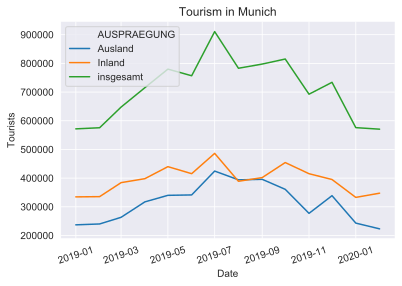

In [52]:
# Plot recent data
fig, ax1 = plt.subplots()
df_plot = df_clean[df_clean.DATE >= '2019-01-01'].copy()
# Only plot the amount of visitors
df_plot = df_plot[df_plot.MONATSZAHL == 'Gäste']
sns.lineplot(x='DATE',y='WERT',hue='AUSPRAEGUNG',data=df_plot,estimator=None, ax=ax1)
ax1.set(xlabel="Date",
       ylabel="Tourists",
       title="Tourism in Munich")
plt.xticks(rotation=18)
sns.despine(fig)

In [53]:
# Save the cleaned data as a csv file
df_clean = df_clean[df_clean.MONATSZAHL == 'Gäste']
df_clean = df_clean.drop(['MONATSZAHL'],axis=1)
df_clean = df_clean[['AUSPRAEGUNG','WERT','DATE']]
df_clean = df_clean[df_clean.WERT != np.NaN]
df_clean.to_csv('../data/munich_visitors/munich-tourism.csv',index=False)